In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense

plt.style.use('ggplot')

# Loading Data

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

iris = load_iris()
X = iris["data"]
y = iris["target"]
target_names = iris['target_names']
features_name = iris['feature_names']

In [3]:
print(target_names)
print(features_name)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


# Prepare Data

In [4]:
y_en = to_categorical(y)

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_en, test_size=0.2, random_state=42)

print(X.shape)
print(y_en.shape)

n_feature = X.shape[1]
n_classes = y_en.shape[1]

(150, 4)
(150, 3)


# Visualize Data

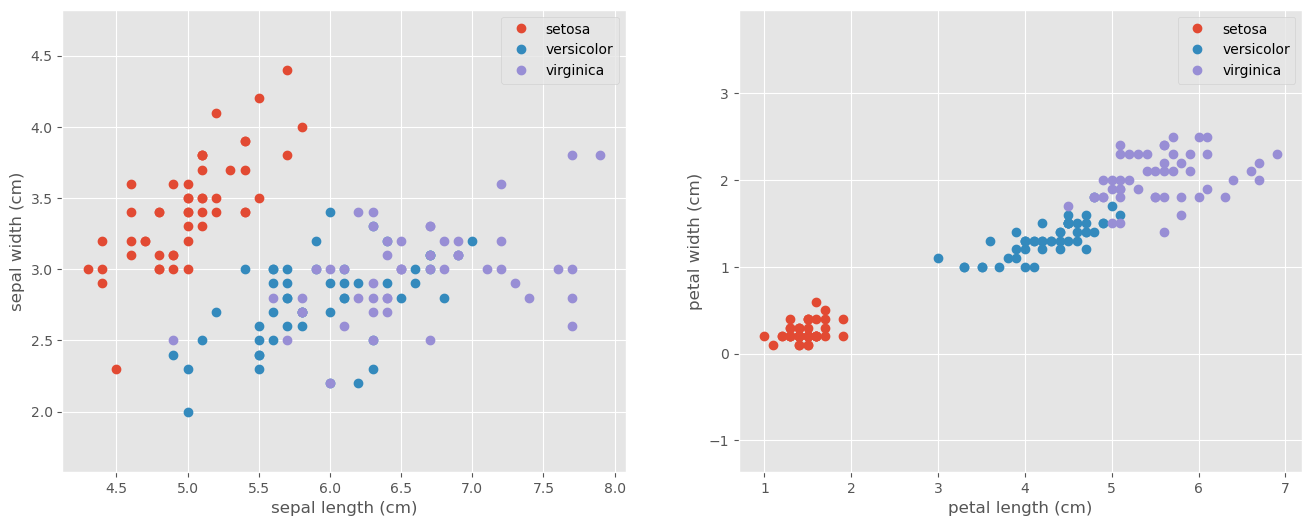

In [5]:
plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(target_names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], marker = 'o', linestyle = 'none', label = target_name)
plt.xlabel(features_name[0]) # sepal length
plt.ylabel(features_name[1]) # sepal width
plt.axis('equal')
plt.legend()

plt.subplot(1, 2, 2)
for target, target_name in enumerate (target_names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 2], X_plot[:,3], marker = 'o', linestyle = 'none', label = target_name)
plt.xlabel(features_name[2]) # petal length
plt.ylabel(features_name[3]) # petal width
plt.axis('equal')
plt.legend()

In [6]:
import warnings
warnings.simplefilter(action = 'ignore', category = UserWarning)
warnings.simplefilter(action = 'ignore', category = FutureWarning)
warnings.simplefilter(action = 'ignore', category = DeprecationWarning) 

# Create Models

In [7]:
def create_custom_model(input_dim, output_dim, neurons, n = 1, name = 'model'): # n number of Hiddenlayers
    def create_model():
        # Create Model
        model = Sequential(name = name)
        # model.add(layers.Input((input_dim,)))
        for i in range(n):
            model.add(Dense(neurons, input_dim=input_dim, activation='relu'))
            model.add(Dense(neurons, activation='relu', name=f'Hidden_layer_{i + 1}'))
            
        model.add(Dense(output_dim, activation = 'softmax', name = 'Output_layer'))

        # Compile model
        model.compile(loss = 'categorical_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])

        return model
    return create_model

n_neurons = 64
models = [create_custom_model(n_feature, n_classes, n_neurons, i, f'model_{i}') for i in range(1, 3)]

for create_model in models:
    create_model().summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer_1 (Dense)          │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,675 (18.26 KB)

 Trainable params: 4,675 (18.26 KB)

 Non-trainable params: 0 (0.00 B)

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer_1 (Dense)          │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_layer_2 (Dense)          │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,995 (50.76 KB)

 Trainable params: 12,995 (50.76 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
from keras.callbacks import CSVLogger, EarlyStopping, ModelCheckpoint
my_callback_list = [
    EarlyStopping(patience = 5 ,  min_delta = 0.0001),
    CSVLogger("./logs/training_cnn.log"),
    ModelCheckpoint(filepath="./models/cnn_{epoch:02d}_{val_loss:.2f}.keras")    
]

In [9]:
History_dict = {}

for create_model in models:
    model = create_model()
    print('Model name   :', model.name)
    history_callback = model.fit(X_train, y_train,
                                 batch_size = 5,
                                 epochs = 50, 
                                 verbose = 0, 
                                 validation_data = (X_test, y_test),
                                 callbacks = my_callback_list)
    score = model.evaluate(X_test, y_test)
    print("Test loss    : ", score[0])
    print("Test accuracy:", score[1])

    History_dict[model.name] = [history_callback, model]

Model name   : model_1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 1.0000 - loss: 0.0918
Test loss    :  0.09178443253040314
Test accuracy: 1.0
Model name   : model_2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.8667 - loss: 0.5857
Test loss    :  0.5857433676719666
Test accuracy: 0.8666666746139526


In [15]:
History_dict

{'model_1': [<keras.src.callbacks.history.History at 0x27713030e10>,
  <Sequential name=model_1, built=True>],
 'model_2': [<keras.src.callbacks.history.History at 0x277131812d0>,
  <Sequential name=model_2, built=True>]}

# Visualize accuracy and loss for each model

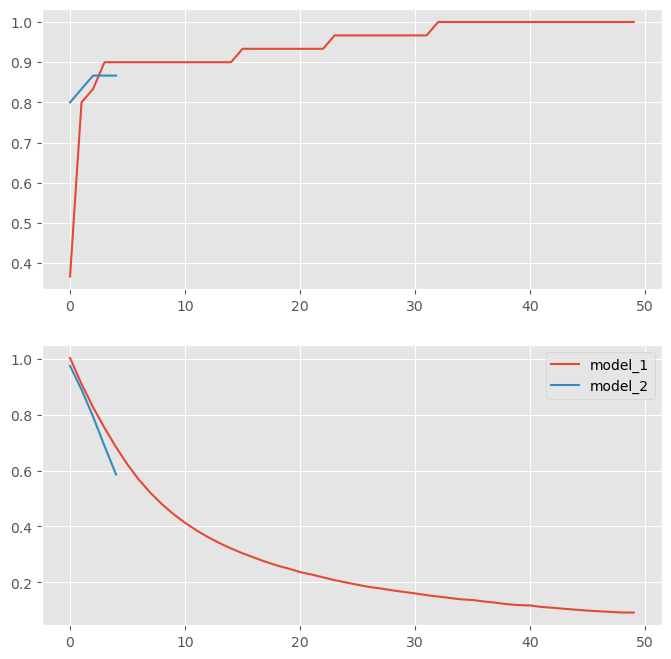

In [10]:
fig, (ax1, ax2) = plt.subplots(2, figsize = (8 ,8))

for model_name in History_dict:
    val_accuracy = History_dict[model_name][0].history['val_accuracy']
    val_loss = History_dict[model_name][0].history['val_loss']
    ax1.plot(val_accuracy, label = model_name)
    
    ax2.plot(val_loss, label = model_name)
    
    plt.legend()

## ROC curve (Receiver operating characteristic)

A ROC curve (characteristic operator curves) is a graph that shows the performance of a classification model for all classification thresholds. This curve represents two parameters:

Rate of True Positive Results
Rate of false positives

AUC stands for "area under the ROC curve". So the AUC measures the entire two-dimensional area under the entire ROC curve (think of the integral calculation value) from (0.0) to (1.1)

AUC represents the probability that a random positive (green) example is positioned to the right of a random negative (red) example.

The AUC value ranges from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0. A model whose predictions are 100% correct has an AUC of 1.0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


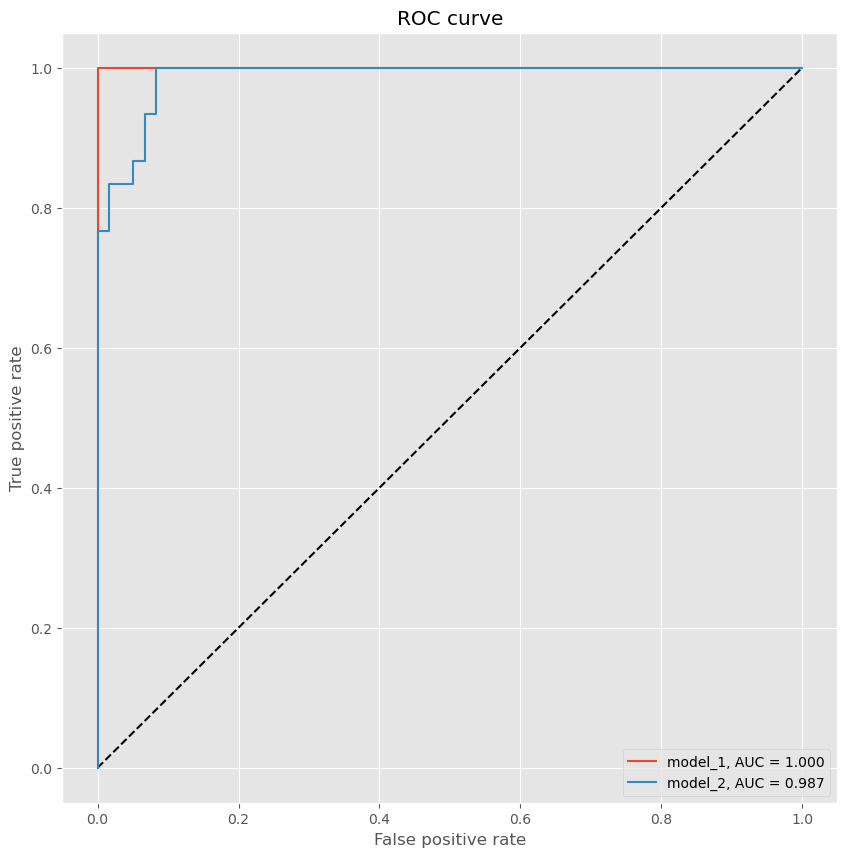

In [11]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize = (10, 10))
plt.plot([0, 1], [0, 1], 'k--')

for model_name in History_dict:
    model = History_dict[model_name][1]
    
    y_pred = model.predict(X_test)
    fpr, tpr, threshold = roc_curve(y_test.ravel(), y_pred.ravel())
    
    plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format(model_name, auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()